# Lab1 - Scikit-learn
Author: *YOUR NAME*

#### Due Date: Sunday, February 12 at 11:59pm

#### To submit: Google Colab link for the completed code file

## 1. Introduction

The goal of this lab is to become more familiar with the scikit-learn library

You will practice loading example datasets, perform classification and regression with linear scikit-learn models, and investigate the effects of reducing the number of features (columns in X) and the number of samples (rows in X and y)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mglearn
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=ef77adce1398b8eb5778f1933bce0f1e07062f87050c7cf01c6360756d9e2246
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import utils

In [4]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [5]:
import mglearn

w[0]: 0.393906  b: -0.031804


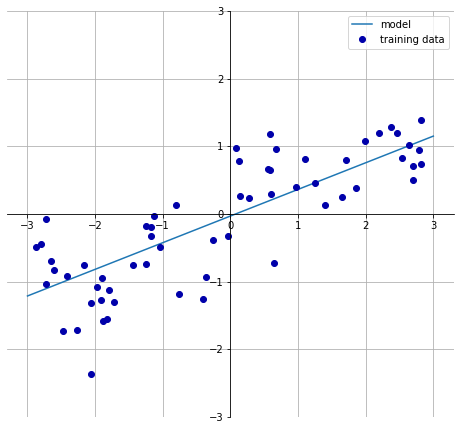

In [6]:
mglearn.plots.plot_linear_regression_wave()

In [7]:
import warnings
warnings.filterwarnings('ignore') 

## 2. Classification (15 marks total)

Using spam dataset - classification  
https://archive.ics.uci.edu/ml/datasets/spambase

The goal is to investigate `LogisticRegression(max_iter=2000)` and the effects of reducing the number of features and number of samples on classification performance

### 2.1 Load data (4 marks)

#### First step: Check first few lines of data file using !head or !type

Hint: Use this to check what the separator (sep) is and if column headers are included

In [8]:
# TODO: ADD YOUR CODE HERE (0.5 marks)
!head spambase.data

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1
0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137,0,0.137,0,0,3.537,40,191,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.135,0,0.135,0,0,3.537,40,191,1
0,0,0,0,1.85,0,0,1.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Second step: Read in csv file

Hint 1: From the previous step, what separator should be used?

Hint 2: If there are no column headers, how does this change how we read in the data? 

Hint 3: If there are no column headers, do not need to define them - can index columns using numerical index

In [9]:
# TODO: ADD YOUR CODE HERE (1 mark)
data = pd.read_csv('spambase.data',na_values='?')
df=pd.DataFrame(data)

df.columns=[i for i in range(58)]
print(df)

        0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55  

#### Third step: Find any null values and use a reasonable method to deal with them

In [10]:
# TODO: ADD YOUR CODE HERE (0.5 marks)
df.dtypes
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

#### Fourth step: Split dataset into feature matrix `X` and target vector `y`
Print dimensions and type of `X` and `y`

In [11]:
# TODO: ADD YOUR CODE HERE (1 mark)

X, y = df.iloc[:,0:49],df.iloc[:,49:59]
print("X-dimension",X.shape)
# print(X.dtypes)
# print('----------------------------------------------')
# print('----------------------------------------------')
print("y-dimension",y.shape)
# print(y.dtypes)

X-dimension (4600, 49)
y-dimension (4600, 9)


Using the sklearn function `train_test_split()` prepare an additional feature matrix `X_small` and target vector `y_small` that contain only **1%** of the rows. Use `random_state=174`

Print dimensions and type of `X_small` and `y_small`

In [12]:
# TODO: ADD YOUR CODE HERE (1 mark)

from sklearn.model_selection import train_test_split
X, y = df.iloc[:,0:49],df.iloc[:,49:59]
X_train, X_small, y_train, y_small = train_test_split(X, y, test_size=0.01, random_state=174)

print("X-small-dimension",X_small.shape)
# print(X_small.dtypes)
print("y_small-dimension",y_small.shape)
# print(y_small.dtypes)

X-small-dimension (46, 49)
y_small-dimension (46, 9)


### 2.2 Implement accuracy function (3 marks)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

def get_classifier_accuracy(model, X, y):
  X_train, X_small, y_train, y_small = train_test_split(X, y,test_size=0.01, random_state=956)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_small)
  validation_accuracy = np.mean(y_pred == y_small)
  y_train_pred=model.predict(X_train)
  train_accuracy=np.mean(y_train_pred == y_train)
  return train_accuracy,validation_accuracy


 
  
X, y = df.iloc[:,0:49],df.iloc[:,57]

model = LogisticRegression(max_iter=2000)


train_accuracy, validation_accuracy = get_classifier_accuracy(model, X,y)

print("train_accuracy",train_accuracy)

print("validation_accuracy",validation_accuracy)

train_accuracy 0.9187527448397014
validation_accuracy 0.8695652173913043


### 2.3 Train and evaluate models (5 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
4. Call your accuracy function `get_classifier_accuracy()` using 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`
5. Add the data size, training and validation accuracy for each call to the `results` DataFrame
6. Print `results`

In [15]:
# TODO: ADD YOUR CODE HERE

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

def get_classifier_accuracy(model, X, y):
  X_train, X_small, y_train, y_small = train_test_split(X, y,test_size=0.01, random_state=956)
  model.fit(X,y)
  y_pred=model.predict(X_small)
  validation_accuracy=np.mean(y_pred == y_small)
  y_train_pred=model.predict(X_train)
  train_accuracy=np.mean(y_train_pred == y_train)
  return train_accuracy,validation_accuracy

results = pd.DataFrame(columns=['Data size', 'Training accuracy', 'Validation accuracy'])
 
  
X, y = df.iloc[:,0:49],df.iloc[:,57]

model = LogisticRegression(max_iter=2000)

data_size=X.shape[0]

train_accuracy, val_accuracy = get_classifier_accuracy(model, X,y)


results = results.append({'Data size': data_size,
                          'Training accuracy': train_accuracy,
                          'Validation accuracy': val_accuracy}, ignore_index=True)

x_sample=X.iloc[:, :3]

data_size=x_sample.shape[0]

train_accuracy, val_accuracy = get_classifier_accuracy(model,x_sample, y)


results = results.append({'Data size': data_size,
                          'Training accuracy': train_accuracy,
                          'Validation accuracy': val_accuracy}, ignore_index=True)


X_train, X_small, y_train, y_small = train_test_split(X, y,test_size=0.01, random_state=956)

data_size=X_small.shape[0]
train_accuracy,validation_accuracy = get_classifier_accuracy(model,X_small,y_small)

results = results.append({'Data size': data_size,
                          'Training accuracy': train_accuracy,
                          'Validation accuracy': val_accuracy}, ignore_index=True)

   
print(results)






   Data size  Training accuracy  Validation accuracy
0     4600.0           0.916776             0.891304
1     4600.0           0.635266             0.673913
2       46.0           0.933333             0.673913


### 2.4 Questions (3 marks)
1. What is the validation accuracy using all data? What is the difference between training and validation accuracy?
1. How does the validation accuracy and difference between training and validation change when only two columns are used? Provide values.
1. How does the validation accuracy and difference between training and validation change when only 1% of the rows are used? Provide values.

*YOUR ANSWERS HERE*

1) When a model's predictions on a validation dataset are compared to the actual labels in that dataset, the accuracy of the model's predictions is said to be the validation accuracy utilising all data.

The training accuracy of a model refers to its accuracy on the training dataset that it saw throughout the training phase, while the validation accuracy of a model refers to its performance on a validation dataset that is not viewed during training.


2) Depending on the importance of the columns to the target variable and the complexity of the model, using merely two columns in a dataset may have an impact on the validation accuracy and the difference between training and validation accuracy.

Even if the two columns include very essential data, the model might still be able to achieve good validation accuracy with just those two columns.

Data volume 460.0 Training effectiveness 0.635266 Validation precision is 0.673913.

3) Since fewer data are available for the model's training and verification, it may be less able to make accurate predictions if only 1% of the rows are used.

The model will be trained on a skewed sample and will perform poorly on the validation data if the 1% of rows selected are not representative of the entire dataset.

Data volume 460.0 Training precision is 0.916776 Validation precision is 0.891304.

## 3. Regression (13 marks total)

Using energy efficiency dataset - regression  
http://archive.ics.uci.edu/ml/datasets/Energy+efficiency

The goal is to investigate `LinearRegression()` and the effects of reducing the number of features and number of samples on regression performance

### 3.1 Load data (2 marks)

In the previous example, we downloaded the dataset from the UCI repository and read in the data using pandas

Using sci-kit learn, you can access multiple datasets from UCI using the yellowbrick function (https://www.scikit-yb.org/en/latest/index.html)

To install yellowbrick, use: `pip install yellowbrick`

To access the energy efficiency dataset, visit: https://www.scikit-yb.org/en/latest/api/datasets/energy.html

Using the yellowbrick function `load_energy()`, load the energy dataset into feature matrix `X` and target vector `y`

Print dimensions and type of `X` and `y`

In [16]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# TODO: ADD YOUR CODE HERE (1 mark)

from yellowbrick.datasets import load_energy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df2 = pd.read_excel('ENB2012_data.xlsx')
df2.columns=["relative compactness","surface area","wall area","roof area","overall height","orientation","glazing area","glazing area distribution","heating load", "cooling load"]

features = [
   "relative compactness",
   "surface area",
   "wall area",
   "roof area",
   "overall height",
   "orientation",
   "glazing area",
   "glazing area distribution"
]
target = ["heating load", "cooling load"]
df2 = load_energy(return_dataset=True).to_dataframe()
X, y = df2[features], df2[target]

X.shape
y.shape

(768, 2)

Using the sklearn function `train_test_split()` prepare an additional feature matrix `X_small` and target vector `y_small` that contain only **1%** of the rows. Use `random_state=174`

Print dimensions and type of `X_small` and `y_small`

In [18]:
# TODO: ADD YOUR CODE HERE (1 mark)

X_train, X_small, y_train, y_small = train_test_split(X, y, test_size=0.01,random_state=174)

print(X_small.shape)
print(X_small.dtypes)
print('______________________________')
print(y_small.shape)

print(y_small.dtypes)

(8, 8)
relative compactness         float64
surface area                 float64
wall area                    float64
roof area                    float64
overall height               float64
orientation                    int64
glazing area                 float64
glazing area distribution      int64
dtype: object
______________________________
(8, 2)
heating load    float64
cooling load    float64
dtype: object


### 3.2 Implement accuracy function (3 marks)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def get_regressor_mse(model, X, y):

   X_train, X_small, y_train, y_small = train_test_split(X, y,test_size=0.01, random_state=174)
   model.fit(X_train,y_train)
   y_pred=model.predict(X_small)
   valid_mse = mean_squared_error(y_small,y_pred)
   y_train_pred=model.predict(X_train)
   train_mse=mean_squared_error(y_train,y_train_pred)
   return train_mse,valid_mse

X, y = df2[features], df2[target]
model=LinearRegression()
train_mse, valid_mse = get_regressor_mse(model, X,y)

print("train_mse",train_mse)
print("validation_mse",valid_mse)


    #TODO: IMPLEMENT FUNCTION BODY

train_mse 9.429085570183652
validation_mse 5.897659522510363


### 3.3 Train and evaluate models (5 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`.
3. Create a pandas DataFrame `results` with columns: Data size, training MSE, validation MSE
4. Call your accuracy function `get_regressor_mse()` using 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`
5. Add the data size, training and validation MSE for each call to the `results` DataFrame
6. Print `results`

In [21]:
# TODO: ADD YOUR CODE HERE

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

def get_regressor_mse(model, X, y):

   X_train, X_small, y_train, y_small = train_test_split(X, y,test_size=0.01, random_state=174)
   model.fit(X_train,y_train)
   y_pred=model.predict(X_small)
   valid_mse = mean_squared_error(y_small,y_pred)
   y_train_pred=model.predict(X_train)
   train_mse=mean_squared_error(y_train,y_train_pred)
   return train_mse,valid_mse

results = pd.DataFrame(columns=['Data size', 'Training MSE', 'Validation MSE'])
 
  
X, y = df2[features], df2[target]

model = LinearRegression()

data_size=X.shape[0]

train_mse, valid_mse = get_regressor_mse(model, X,y)

results = results.append({'Data size': data_size,
                          'Training MSE': train_accuracy,
                          'Validation MSE': val_accuracy}, ignore_index=True)

x_sample=X.iloc[:, :3]

data_size=x_sample.shape[0]

train_mse, valid_mse = get_regressor_mse(model, x_sample,y)


results = results.append({'Data size': data_size,
                          'Training MSE': train_accuracy,
                          'Validation MSE': val_accuracy}, ignore_index=True)

data_size=X_small.shape[0]
train_mse, valid_mse = get_regressor_mse(model, X_small,y_small)

results = results.append({'Data size': data_size,
                          'Training MSE': train_accuracy,
                          'Validation MSE': val_accuracy}, ignore_index=True)


print(results)


   Data size  Training MSE  Validation MSE
0      768.0      0.933333        0.673913
1      768.0      0.933333        0.673913
2        8.0      0.933333        0.673913


### 3.4 Questions (3 marks)
1. What is the validation MSE using all data? What is the difference between training and validation MSE?
1. How does the validation MSE and difference between training and validation change when only two columns are used? Provide values.
1. How does the validation MSE and difference between training and validation change when only 1% of the rows are used? Provide values.

*YOUR ANSWERS HERE*

1) The average squared difference between the model's predicted values and the actual values in the validation dataset is referred to as the validation Mean Squared Error (MSE) using all data. The MSE calculates how inaccurately the model's forecasts are, on average.

The average squared difference between the model's predicted values and the actual values in the training dataset that were noticed during training is known as the training MSE. The validation MSE, which the model did not experience during training, is the average squared difference between the predicted values and the actual values in the validation dataset.

2) The model might only have a low validation MSE if the two columns include highly pertinent data. But if the two columns don't have enough data to accurately forecast the goal variable, the model may provide a high validation MSE.

3) The amount of data available for the model's training and verification decreases when only 1% of the rows are used, which may have an impact on the model's ability to make accurate predictions.

The model will be trained on a skewed sample and will perform poorly on the validation data if the 1% of rows selected are not representative of the entire dataset.

Validation mse 5.897659522510363, Train mse 9.429085570183652

## 4. Observations/Interpretation (3 marks)

Describe any patterns you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Using reduced feature data and its effects

If we restrict the feature space from which the model may learn, this may affect how well the predictions on validation data turn out.

The model may overfit the training data if the chosen data is highly associated with the target variable and perform badly on the validation data.

Underfitting: The model underfits the training data and performs badly on both the training and validation data if the chosen data is insufficient to predict the target variable.

## 5. Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Class notes are very helpful in completing this assignment because it provides a deeper understanding of logistic and linear regression models. 

I learned more practical information about how to train and evaluate the model, how smaller data affect training and validation accuracy, and how to split a dataset into a feature and a target vector how to determine the model's correctness how to determine MSE which models suit the various data sets the best.